In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt
import contextily as ctx # Für Hintergrundkarte
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"
folderpath_geo=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Geodaten"

Auf windows funktioniert die Instellation von contextil am besten via conda-Befehl. (anders gehts nicht)
- conda install contextily --channel conda-forge


# Finen und Laden der Karte der Gemeinden 
Hier gefunden:
https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.html


In [2]:
gdf_gemeinden = gpd.read_file(folderpath_geo+'/ggg_2019-LV95/shp/g1a19.shp')

In [3]:
gdf_zg=gdf_gemeinden[gdf_gemeinden["AName"]=="Zug"]

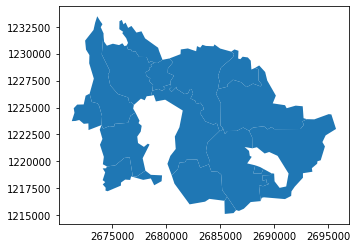

In [4]:
gdf_zg.plot()

# File mit den HR-Daten 


In [5]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/Kanton_ganz_mit_Vergleichswert")

In [6]:
dfhr=df_sauber[["Adresse", "Firmen","Telbuch","Vergleich", "GDENAME", "GKODE","GKODN"]]

In [7]:
dfhr.dtypes

Adresse       object
Firmen         int64
Telbuch        int64
Vergleich    float64
GDENAME       object
GKODE        float64
GKODN        float64
dtype: object

In [8]:
# Nun nur jene Adressen rausfiltern, an welchen Firmen ansässig sind
dfhr_pl=dfhr[dfhr["Firmen"]>0]

In [9]:
# Noch eine Spalte kreieren mit der Wurzel aus der Anzahl Firmen (kann so evtl besser dargestellt werden)
dfhr_pl["Wurzelwert"]=dfhr_pl["Firmen"]**(1/2)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
dfhr_pl

Adresse  Firmen  Telbuch  Vergleich GDENAME  \
0          Zugerstrasse 74, Baar     164       12  13.666667    Baar   
1            Mühlegasse 18, Baar      92       57   1.614035    Baar   
2         Blegistrasse 11b, Baar      88       13   6.769231    Baar   
3     Sihlbruggstrasse 105, Baar      80       39   2.051282    Baar   
4        Ruessenstrasse 12, Baar      75       16   4.687500    Baar   
...                          ...     ...      ...        ...     ...   
6968       Chamerstrasse 45, Zug       2        5   0.400000     Zug   
6970       Chamerstrasse 47, Zug       1        4   0.250000     Zug   
6973       Chamerstrasse 50, Zug      15       12   1.250000     Zug   
6976       Chamerstrasse 52, Zug      11        5   2.200000     Zug   
6978       Chamerstrasse 54, Zug       3        4   0.750000     Zug   

            GKODE        GKODN  Wurzelwert  
0     2681933.977  1226416.568   12.806248  
1     2682425.299  1228159.836    9.591663  
2     2685739.840  1230044.629    9.380832  
3     2684903.579  1229684.742    8.944272  
4     2685107.750  1229580.996    8.660254  
...           ...          ...         ...  
6968  2680878.372  1225294.140    1.414214  
6970  2680840.404  1225315.633    1.000000  
6973  2680869.425  1225328.661    3.872983  
6976  2680846.193  1225345.734    3.316625  
6978  2680828.182  1225361.153    1.732051  

[3306 rows x 8 columns]

In [11]:
# Kreieren der Angabe der Geometrie. Mit Hilfe der Gemeindekoordinaten.
dfhr_pl['Punkt'] = dfhr_pl.apply(lambda row: Point(row["GKODE"], row["GKODN"]), axis=1)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
gdf_hr=gpd.GeoDataFrame(dfhr_pl, geometry="Punkt")

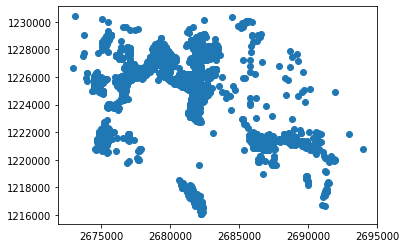

In [13]:
gdf_hr.plot()

Text(0.5, 1, 'Firmensitze im Kanton Zug')

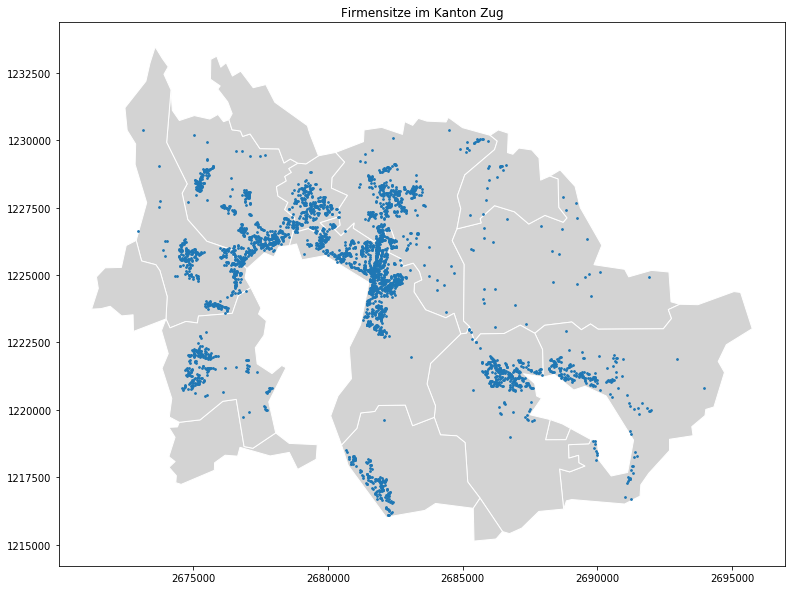

In [14]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)
ax.set_title("Firmensitze im Kanton Zug")

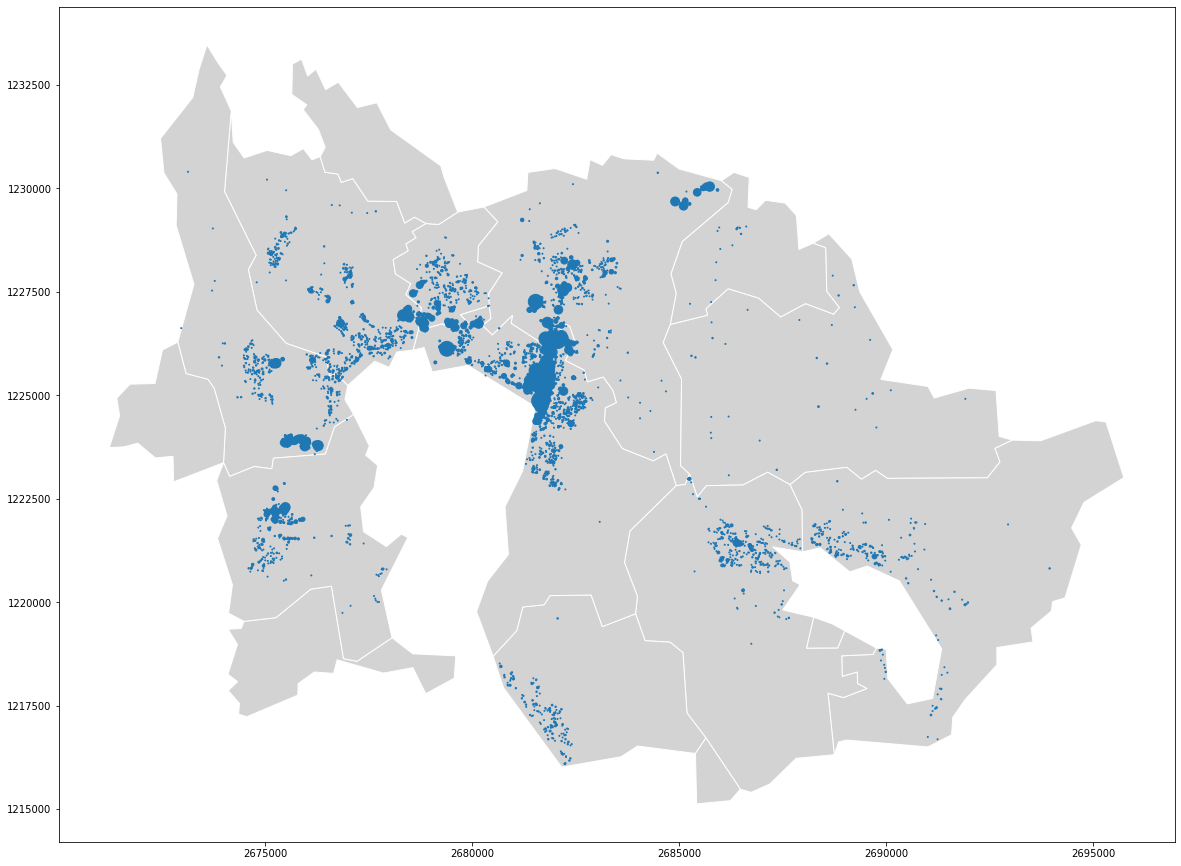

In [15]:
# Nun noch auf der Karte von der Stadt alleine
ax = gdf_zg.plot(figsize=(20,30), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,30), markersize=gdf_hr['Firmen'], ax=ax)

### Punkte in unterschiedlicher Grösse

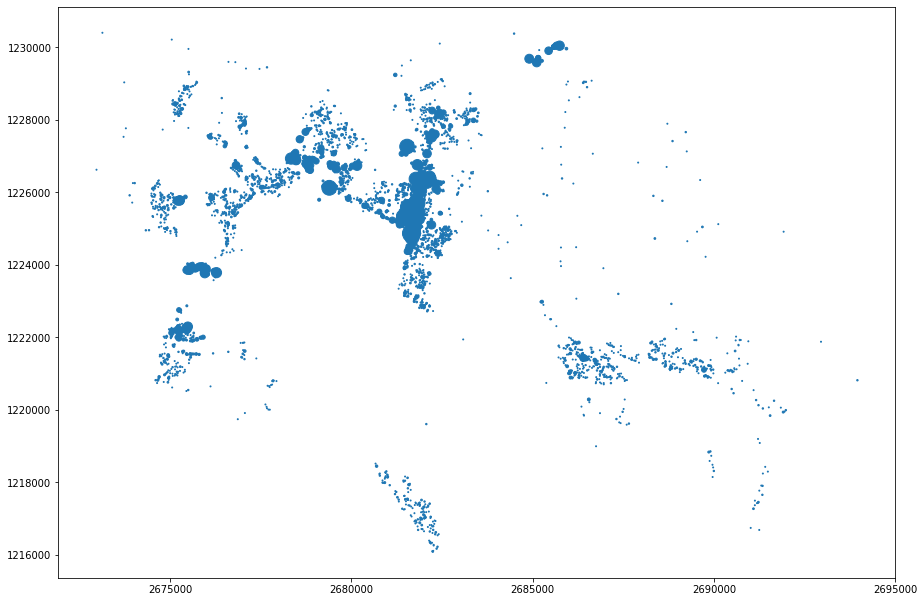

In [16]:
gdf_hr.plot(markersize=gdf_hr['Firmen'], figsize=(15,20))

Text(0.5, 1, 'Firmensitze in der Stadt Zug')

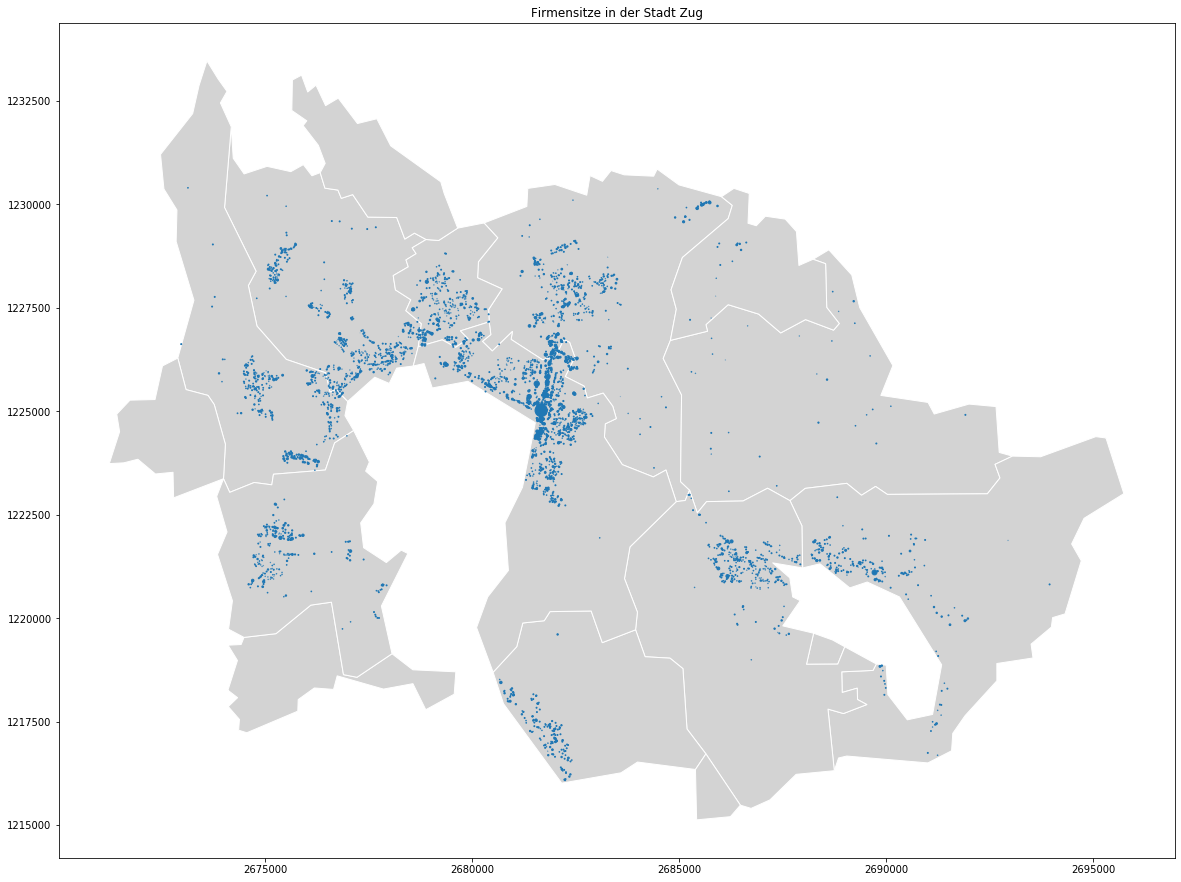

In [17]:
ax = gdf_zg.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Vergleich'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")

### Karte mit Strassen
um es für die Grafik einfacher zu machen, versuche ich die Punkte nun noch auf eine Strassenkarte zu plotten.

In [19]:
gdf_strassen = gpd.read_file(folderpath_geo+'\Kanton_Zug_Strassen\shapefiles\kantonale_ausnahmetransportrouten\\route.shp')

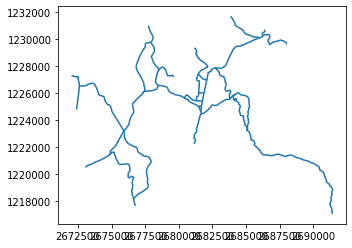

In [20]:
gdf_strassen.plot()

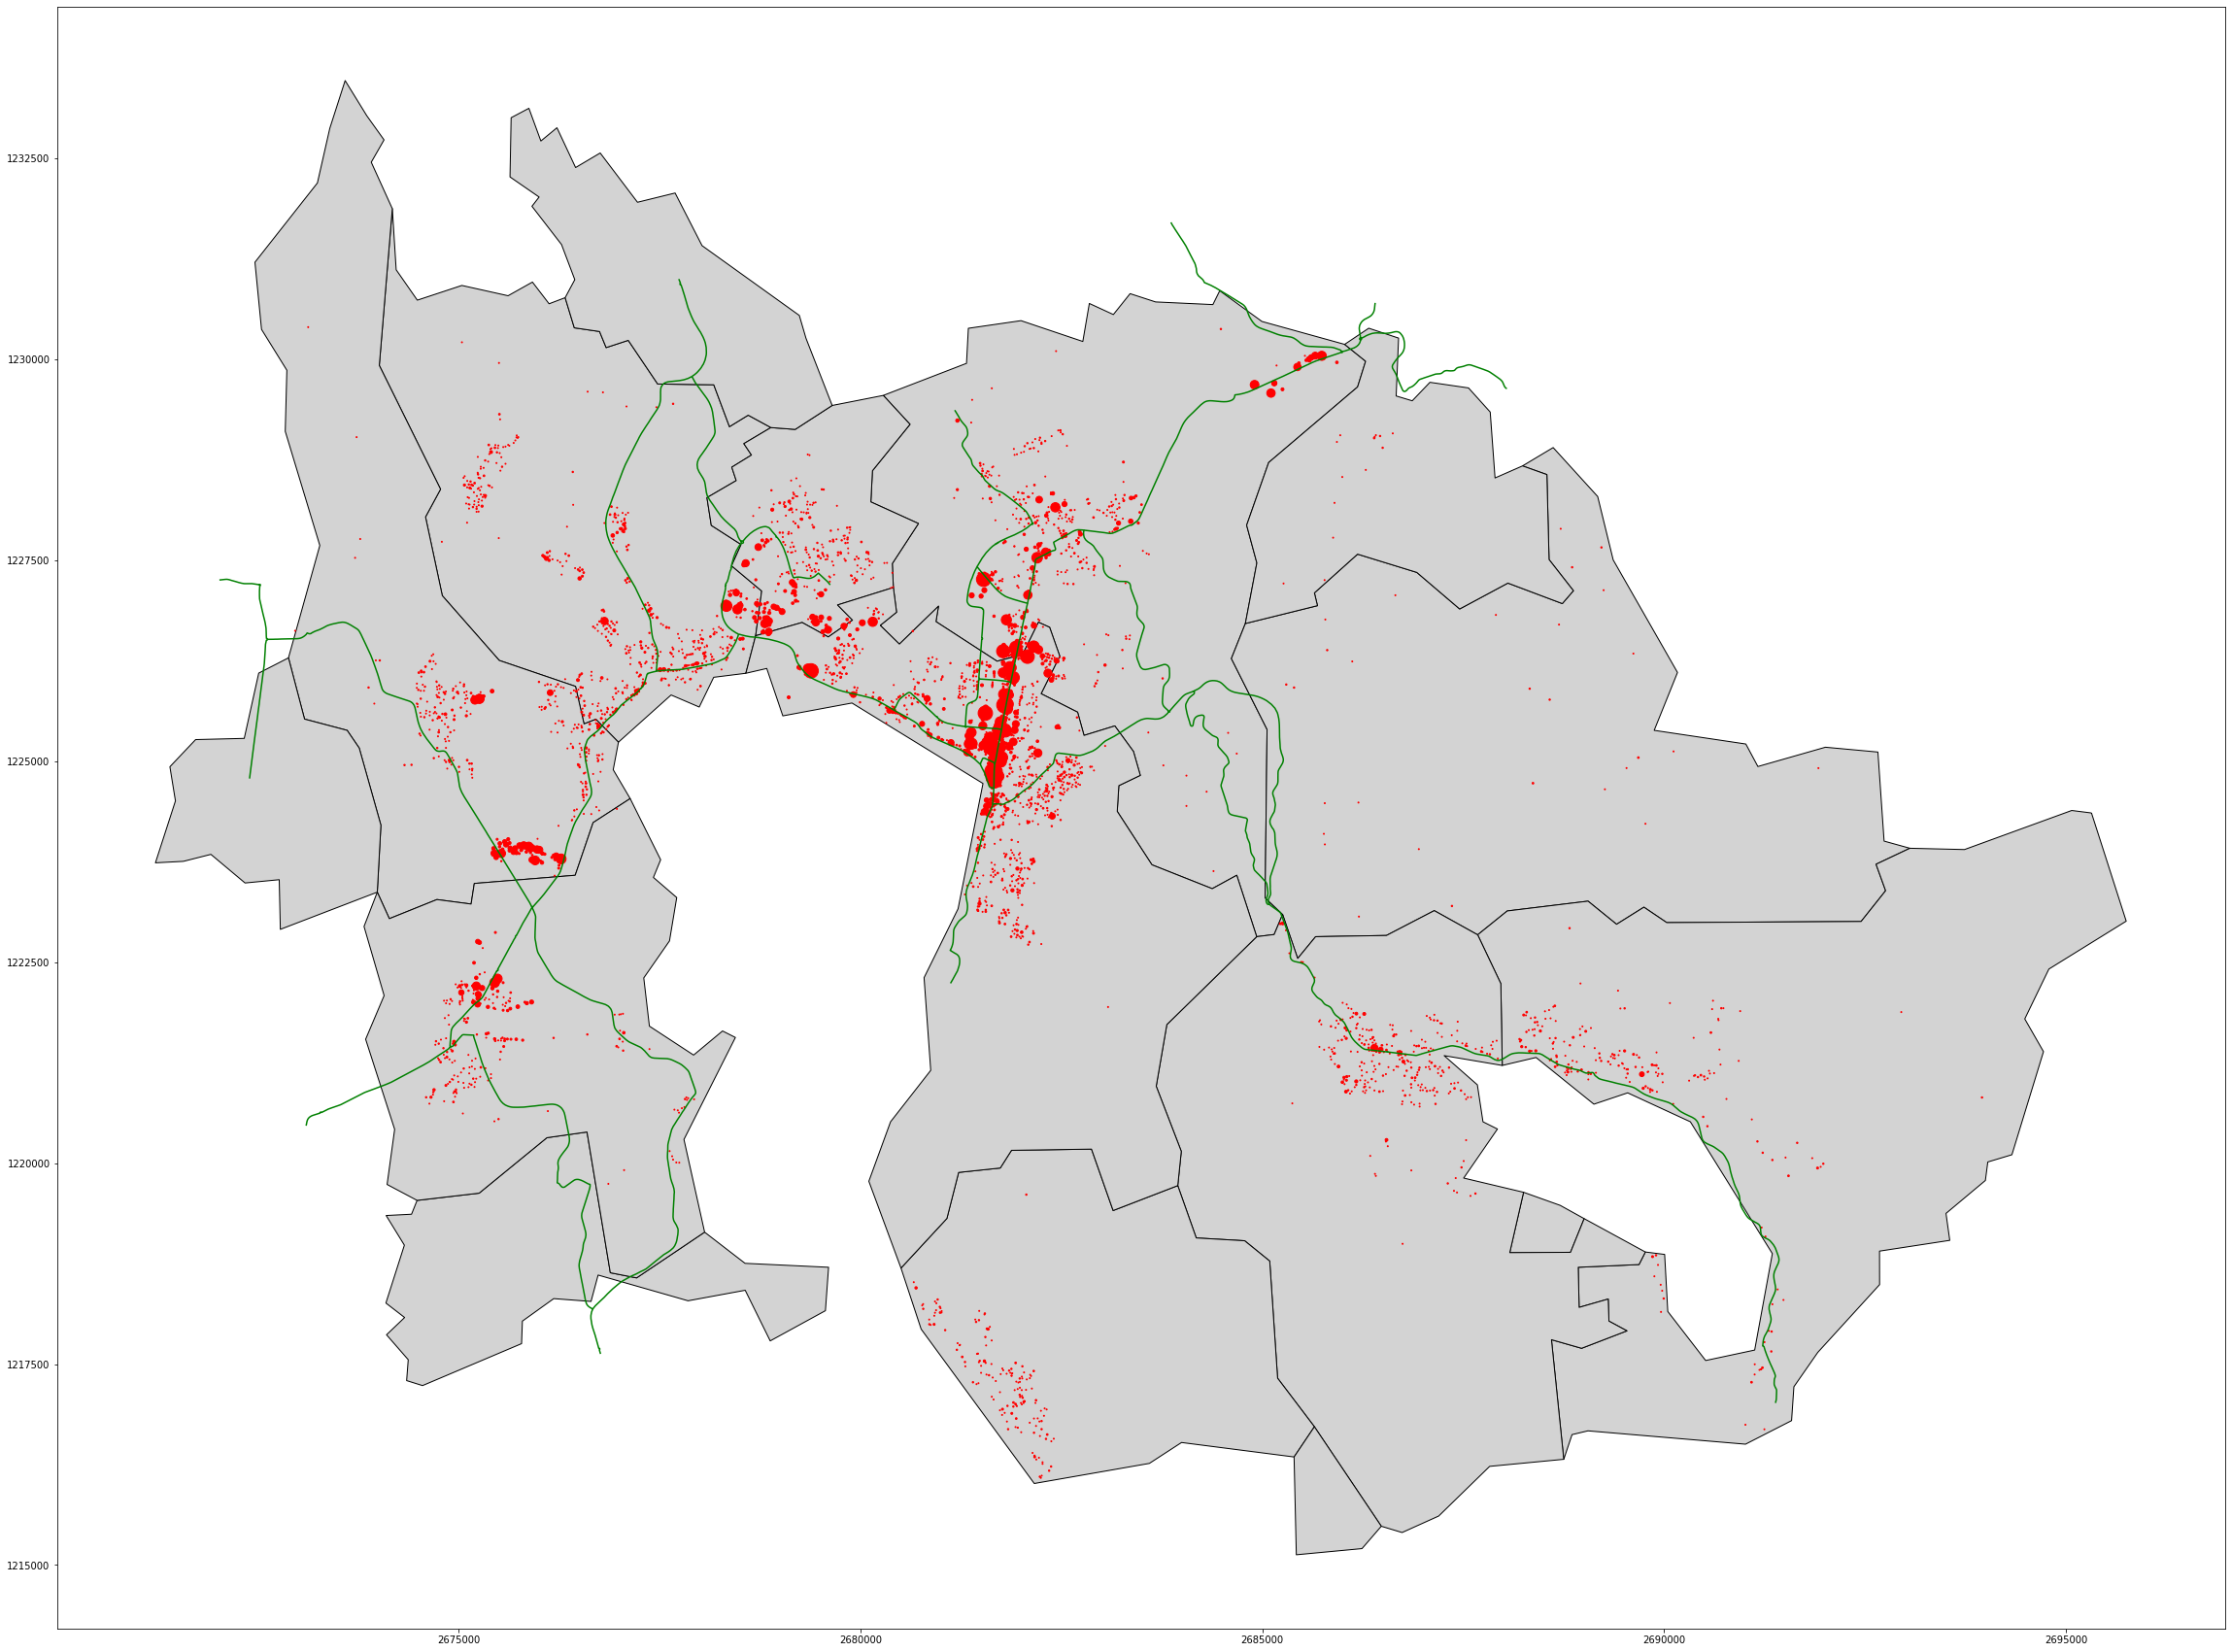

In [21]:
fig, ax = plt.subplots(figsize=(40,50))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(30,40))

gdf_zg.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(30,40))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Firmen'], figsize=(30,40))

plt.show()



### Nun noch mit Strasse für die Stadt Zug

NameError: name 'gdf_stadtzug' is not defined

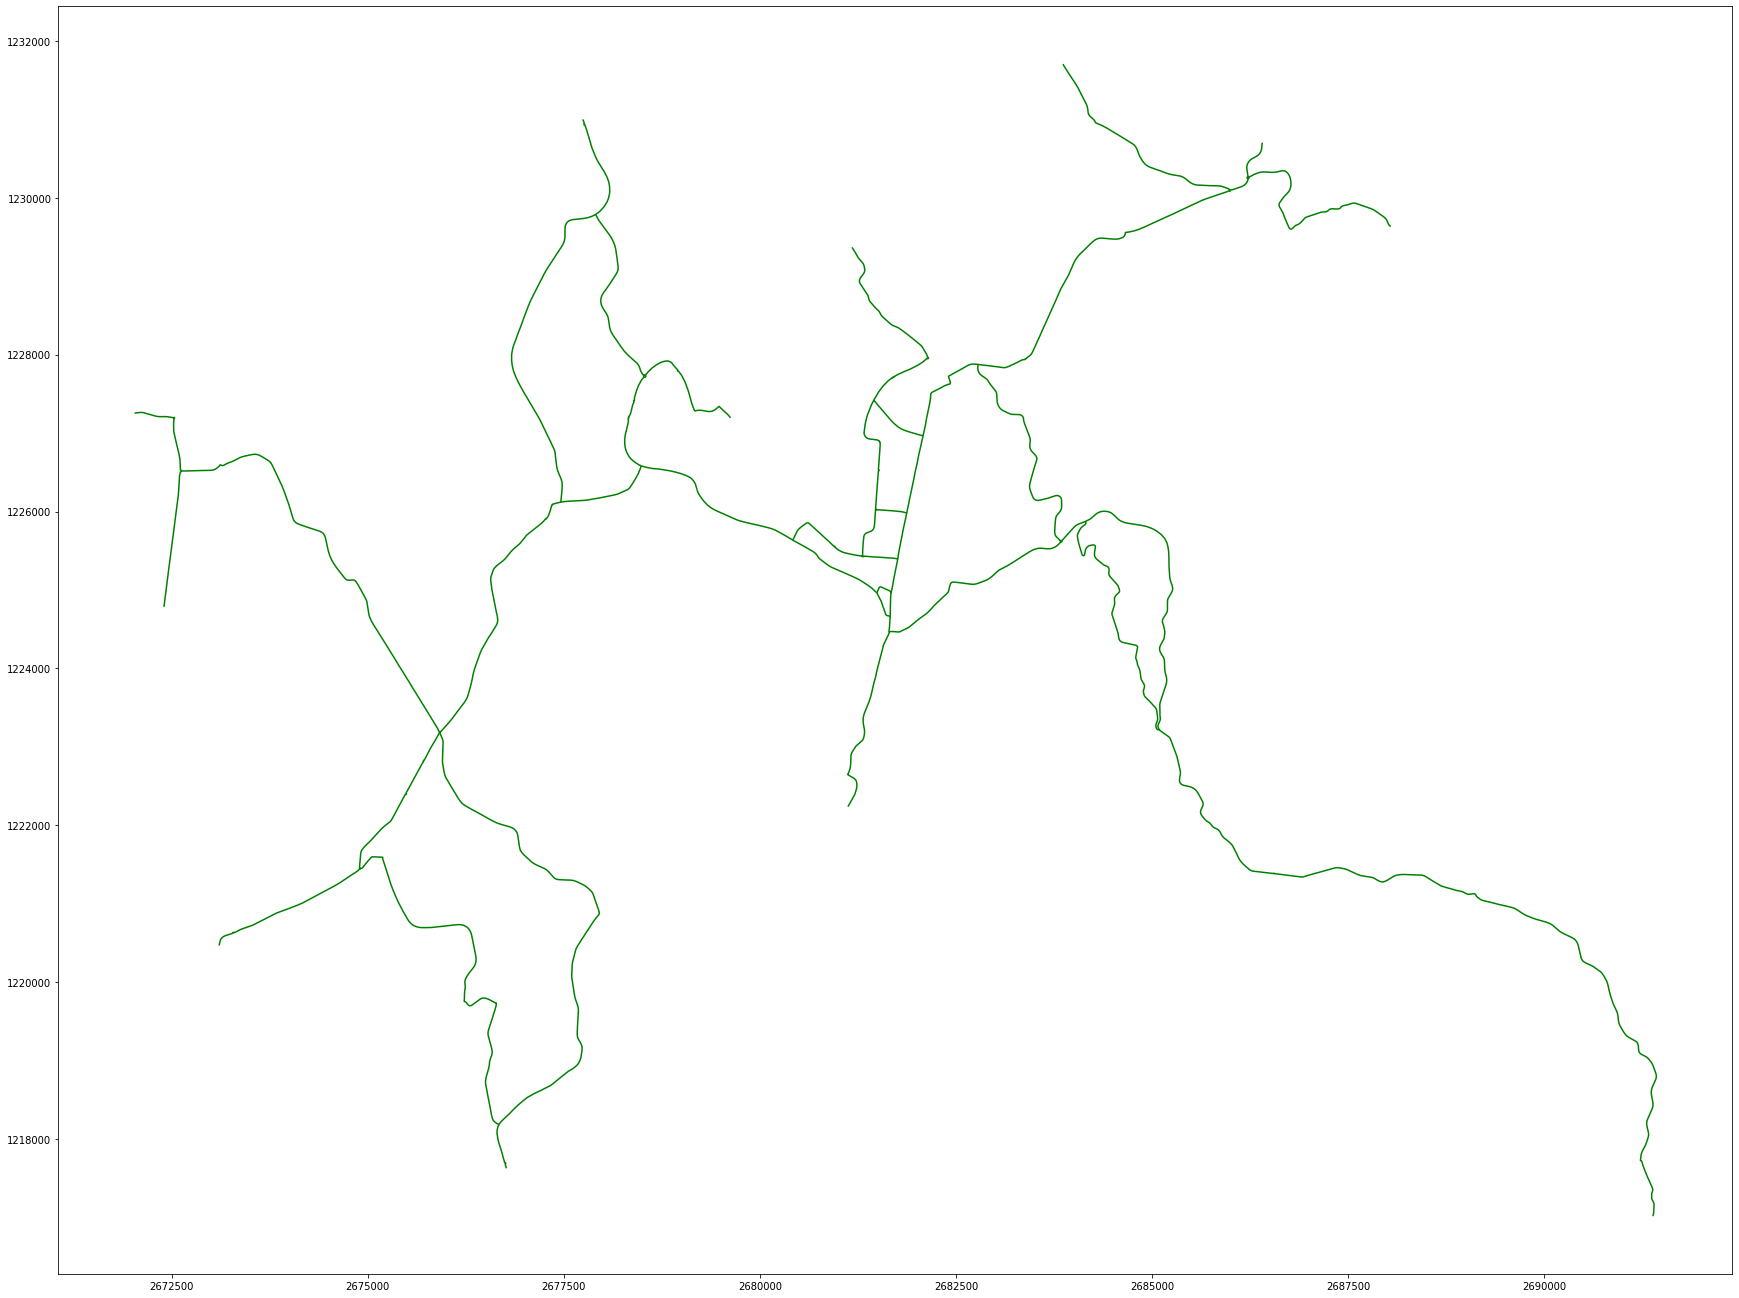

In [22]:
fig, ax = plt.subplots(figsize=(30,40))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(20,30))

gdf_stadtzug.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(20,30))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Vergleich'], figsize=(20,30))

plt.show()
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

#### Nun auch für die Strassen nur Zug. Vielleicht mit Hilfe der overlay-Funktion?

In [ ]:
#Intersection funktioniert nicht, da ich nur Linien habe
gdfkarte= gpd.overlay(gdf_strassen, gdf_stadtzug, how='intersection')

In [24]:
#vielleicht mit add_basemap. 
ax = gdf_zg.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Firmen'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])
ctx.add_basemap(ax, zoom=12)
# Hmm noch nicht das was es sein sollte. Vielleicht noch Format anpassen

#### Wie bringe ich die Punkte zusammen mit der Karte hin
Ich muss zuerst dem gdf_hr ein crs-Format geben. Danach in das Merkator-Format umwandeln.

In [25]:
gdf_zg_es=gdf_zg.to_crs(epsg=3857) #umwalndeln in Merkator
gdf_hr.crs=({'init' :'epsg:2056'}) #Zuerst crs. geben
gdf_hr_es=gdf_hr.to_crs(epsg=3857)# umwandeln in Merkator

In [27]:
gdf_zg.crs

{'init': 'epsg:2056'}

In [28]:
gdf_zg_es.crs 

{'init': 'epsg:3857', 'no_defs': True}

In [29]:
gdf_hr.crs

{'init': 'epsg:2056'}

In [30]:
gdf_hr_es.crs

{'init': 'epsg:3857', 'no_defs': True}

In [35]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.1, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=3,color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)

# Die PUnkte kommen einfach nicht mehr... 
#https://gis.stackexchange.com/questions/283677/geometry-data-in-geodataframe-will-not-plot (vielleicht da was)

# Hier mit der Grösse der Firmen
Je mehr Firmen desto grösser der Punkt

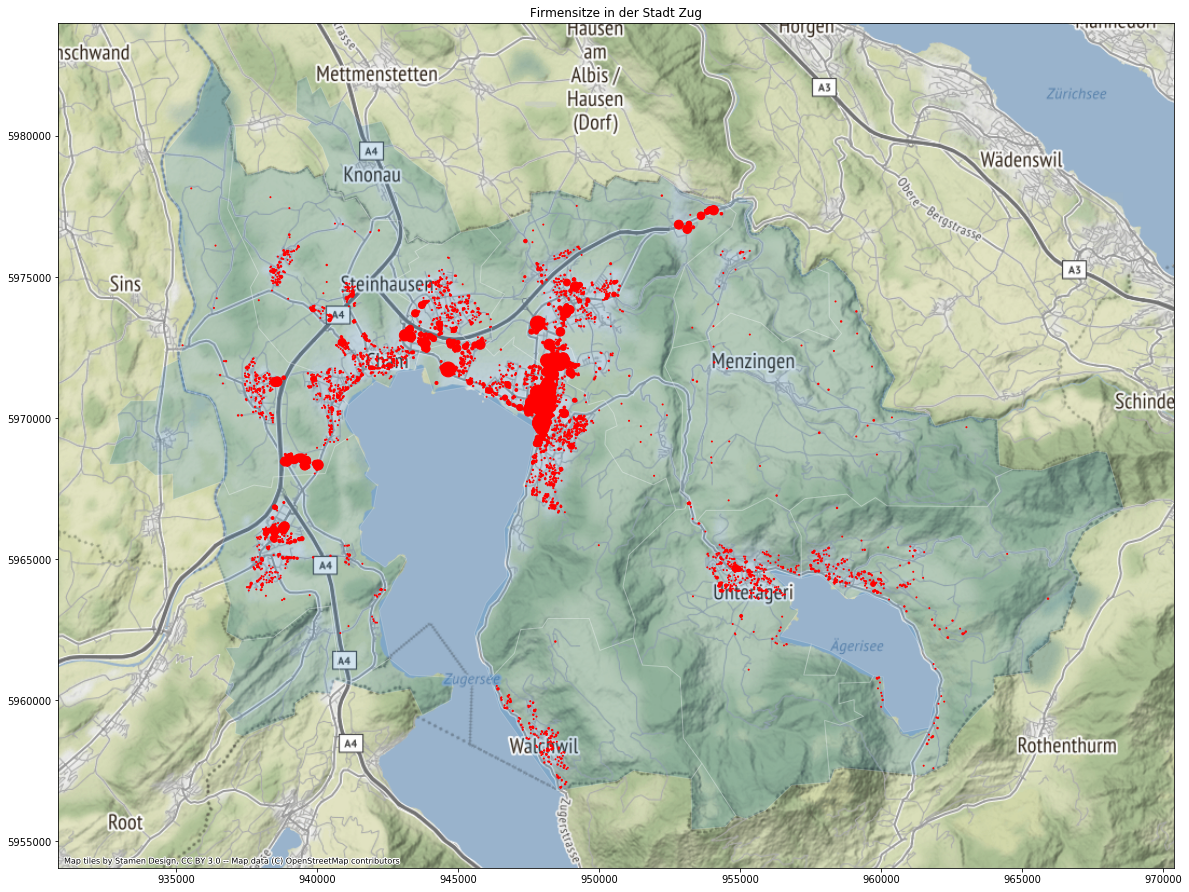

In [38]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.2, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=gdf_hr['Firmen'],color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)


# Hier mit dem Vergleichswert 
Die Stadt Zug kristallisiert sich heraus - die anderen Hubs werden kleiner 

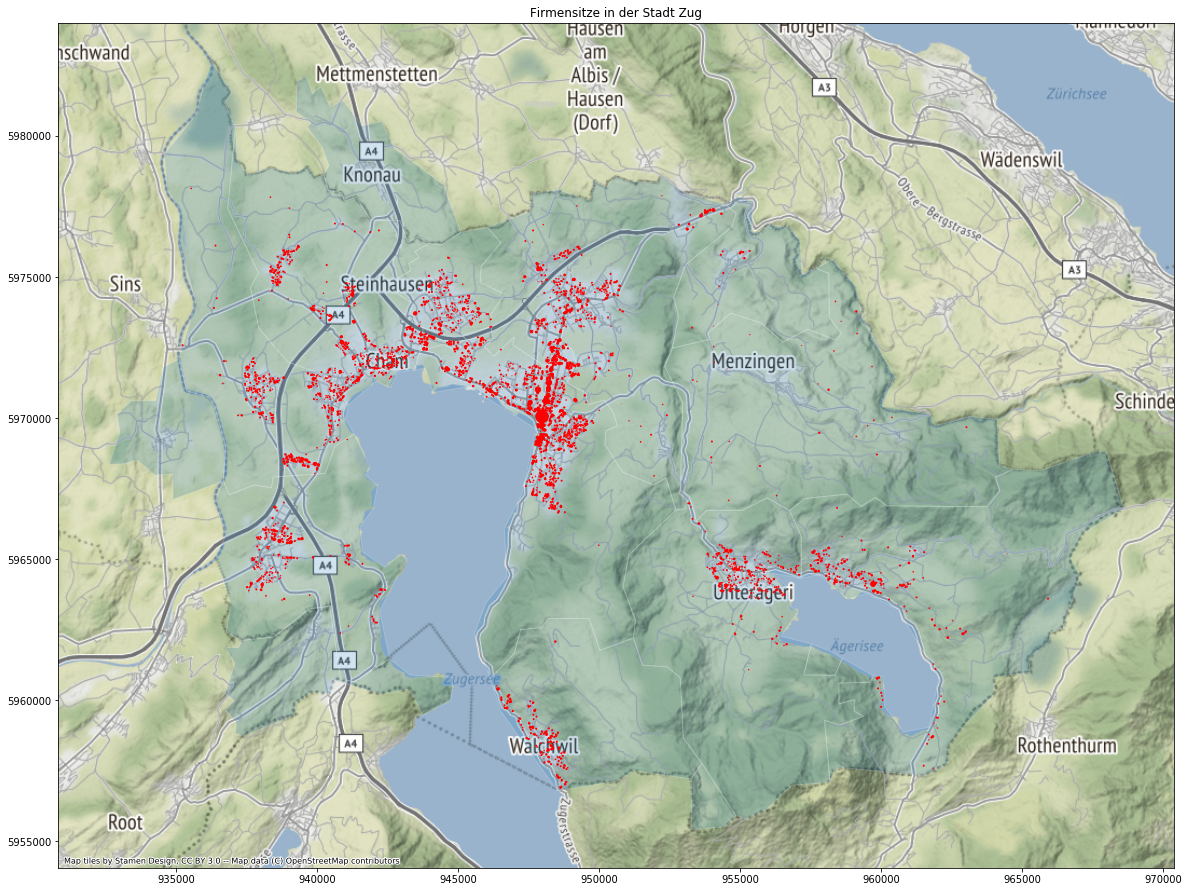

In [39]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.2, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=gdf_hr['Vergleich'],color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)

In [ ]:
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

In [ ]:
gdf_landeskarte = gpd.read_file(folderpath_geo+'\Landeskarte\geothermie.shp')

In [ ]:
gdf_landeskarte

In [ ]:
gdf_landeskarte.plot()

In [ ]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

In [ ]:
gdfstr=gpd.read_file(folderpath_geo+"\Strassendaten\Shapefiles\09_DKM1M_STRASSE_PKT.shp")